In [73]:
# download stroke prediction dataset from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


In [74]:
#import data and show head 


import pandas as pd # data manipulation and analysis
import numpy as np # # for scientific computing and array processing

# Read the CSV file and store it as a Pandas DataFrame object
# The ".." denotes that the file is located one level up from the current directory
df = pd.read_csv('../csv/healthcare-dataset-stroke-data.csv')
# Display the first 8 rows of the DataFrame to check if the data has been loaded correctly
df.head(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1


In [75]:
# Check for missing values in the dataset
print(df.isnull().sum())

# Fill missing values in the DataFrame with the mean value of each column
# This is a form of data processing that imputes missing values with the column mean
df.fillna(df.mean(), inplace=True)

# Check for missing values in the dataset
print(df.isnull().sum())

# # Remove duplicate rows from the dataset
# df.drop_duplicates(inplace=True)

# Display the first 7 rows of the DataFrame to check if the missing values have been filled
df.head(7)


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


/tmp/ipykernel_6693/1345675681.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1


In [76]:
#encode the gender, age, hypertension, ever_married, residence_type, bmi, smoking_status
# The LabelEncoder class is used for label encoding categorical variables
from sklearn.preprocessing import LabelEncoder # Import the LabelEncoder class from the scikit-learn library

le = LabelEncoder() # Create an instance of the LabelEncoder class

# convert label to numeric using label encoder

def convert_label_to_numeric(list_of_columns, df):
    for column in list_of_columns:
        df[column] = le.fit_transform(df[column])
    return df


list_of_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df = convert_label_to_numeric(list_of_columns, df)


# Display the first 7 rows of the DataFrame to check if the label encoding has been performed correctly
df.head(7)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.400000,2,1


In [77]:
#describe the data
# Use the describe() method of the Pandas DataFrame object to get a summary of the data
# This method provides statistical information about the numerical columns in the DataFrame
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [78]:
# show correlation using the correlation() function
# set the numeric_only parameter to True to calculate the correlation only for numeric data
# returns a dataframe of the pairwise correlation of columns, excluding NA/null values
df.corr(numeric_only=True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002511,0.003538,0.003550,-0.001296,0.013690,-0.015757,-0.001403,0.001092,0.002999,0.014074,0.006388
gender,0.002511,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026109,-0.062581,0.008929
age,0.003538,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257
hypertension,0.003550,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904
heart_disease,-0.001296,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914
ever_married,0.013690,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340
work_type,-0.015757,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.001403,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458
avg_glucose_level,0.001092,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945
bmi,0.002999,-0.026109,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947


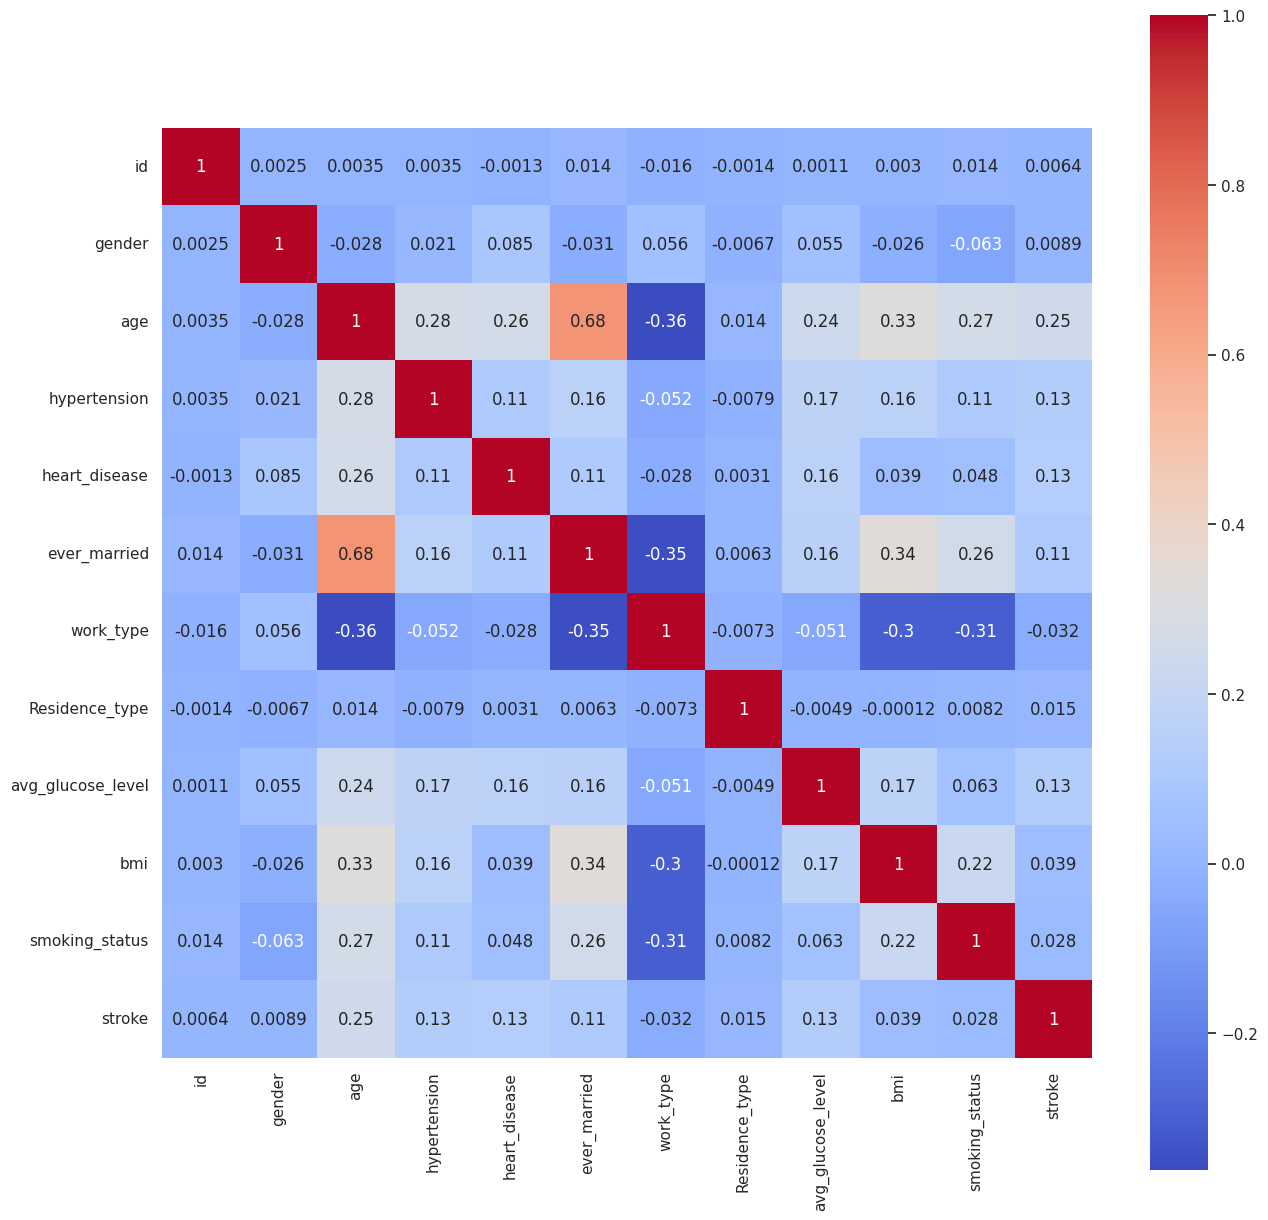

In [79]:
# Import the necessary libraries for data visualization and analysis
import matplotlib.pyplot as plt # library for creating visualizations
import seaborn as sns # library for statistical data visualization

# create a function to show plot
def show_plot(df):
    # Set the size of the figure
    plt.figure(figsize=(15, 15))


    # Set the style and context for the plot using seaborn
    sns.set(style='whitegrid', context='notebook')

    # Define the columns to include in the heatmap
    cols = [0, 1, 2]

    # Create a heatmap of the correlation matrix for the selected columns
    # - df.corr(): computes pairwise correlation of columns, excluding NA/null values
    # - annot=True: show the correlation coefficient in each cell
    # - square=True: set the axes aspect ratio to 'equal'
    # - cmap='coolwarm': set the color map to 'coolwarm'
    sns.heatmap(df.corr(), annot=True, square=True, cmap='coolwarm')

    # Display the plot
    plt.show() 
    
# call the function to show plot
show_plot(df)


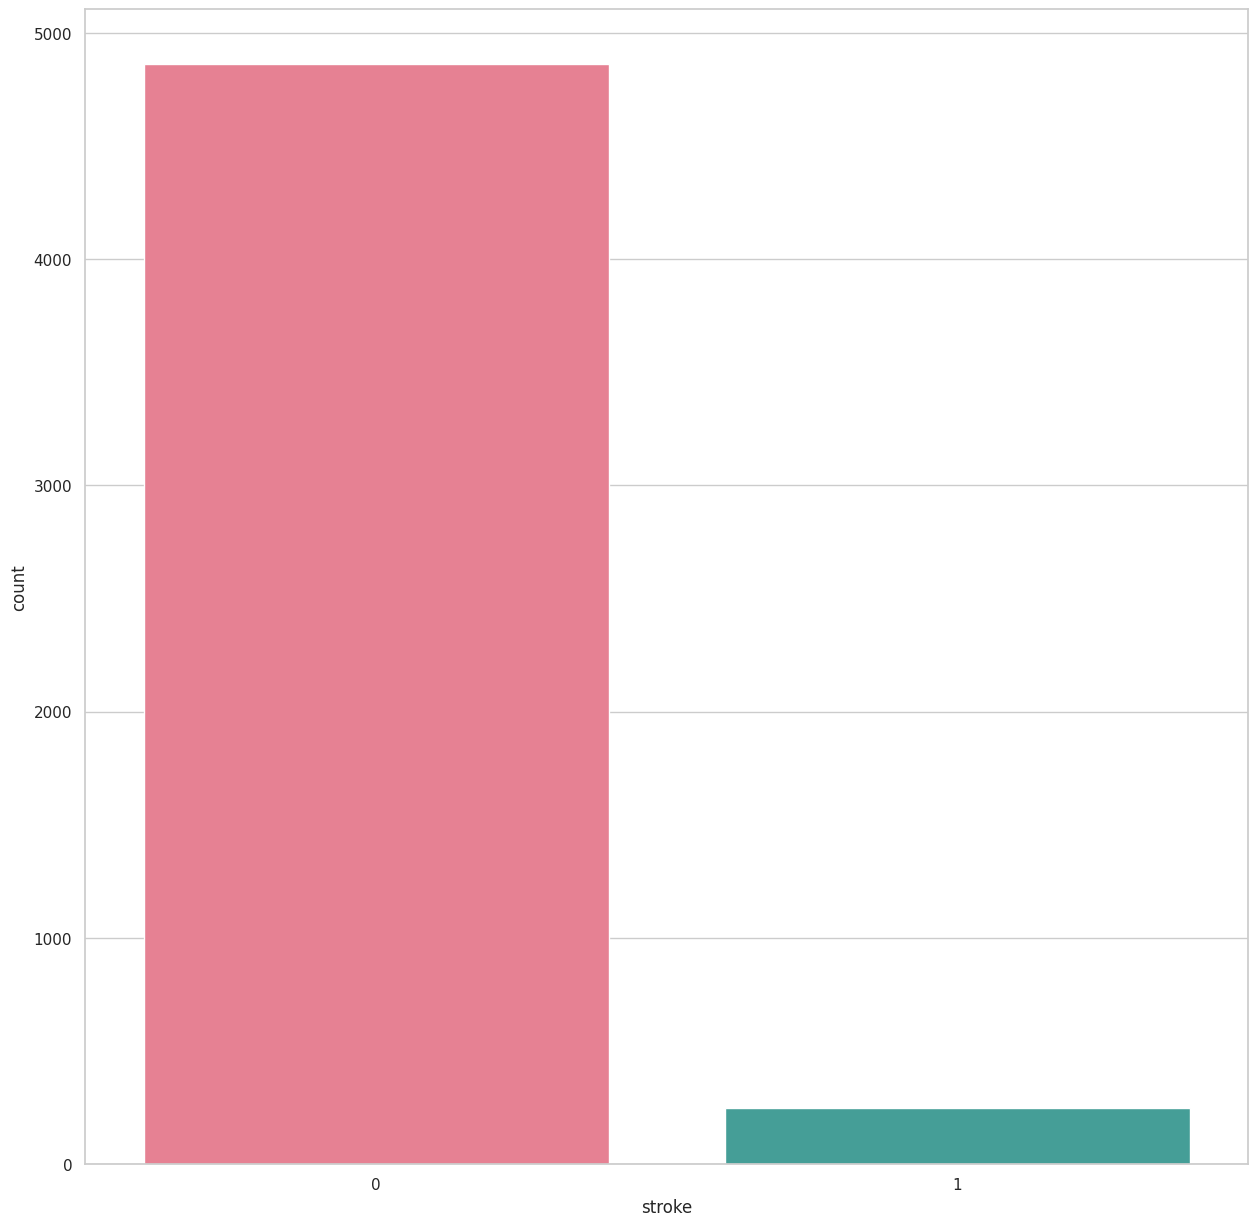

In [80]:
# crate a function to show bar plot of the target variable not the values are only 0 and 1

def show_bar_plot(df, target_variable):
    # Set the size of the figure
    plt.figure(figsize=(15, 15))

    # Set the style and context for the plot using seaborn
    sns.set(style='whitegrid', context='notebook')

    # Create a countplot of the target variable
    # - data=df: use the dataframe df to create the plot
    # - x=target_variable: the column to be plotted on the x-axis
    # - palette='husl': set the color palette to 'husl'
    sns.countplot(data=df, x=target_variable, palette='husl')

    # Display the plot
    plt.show()

# call the function to show bar plot
show_bar_plot(df, 'stroke')
 

In [81]:
# split the data into features and target
# use iloc to select the columns to use for the features

X = df.iloc[:, :-1].values # X will contain all the columns except the last one which is the target variable
y = df.iloc[:, -1].values # y will contain the target variable

# print the feature data to check that it was selected correctly
X 


array([[9.04600000e+03, 1.00000000e+00, 6.70000000e+01, ...,
        2.28690000e+02, 3.66000000e+01, 1.00000000e+00],
       [5.16760000e+04, 0.00000000e+00, 6.10000000e+01, ...,
        2.02210000e+02, 2.88932369e+01, 2.00000000e+00],
       [3.11120000e+04, 1.00000000e+00, 8.00000000e+01, ...,
        1.05920000e+02, 3.25000000e+01, 2.00000000e+00],
       ...,
       [1.97230000e+04, 0.00000000e+00, 3.50000000e+01, ...,
        8.29900000e+01, 3.06000000e+01, 2.00000000e+00],
       [3.75440000e+04, 1.00000000e+00, 5.10000000e+01, ...,
        1.66290000e+02, 2.56000000e+01, 1.00000000e+00],
       [4.46790000e+04, 0.00000000e+00, 4.40000000e+01, ...,
        8.52800000e+01, 2.62000000e+01, 0.00000000e+00]])

In [82]:
# covert the data into 0 - 1 range using minmax scaler
# # Import the MinMaxScaler class from the scikit-learn library
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler class
scaler = MinMaxScaler()

# Use the fit_transform method to rescale the input data X into the range of 0 to 1
X_scaler = scaler.fit_transform(X)

# Convert the rescaled data into a Pandas DataFrame called df
df = pd.DataFrame(X_scaler)

# Display the first few rows of the DataFrame to check if the data has been rescaled correctly
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.123214,0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.301260,0.333333
1,0.708205,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.212981,0.666667
2,0.426015,0.5,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.254296,0.666667
3,0.824928,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.276060,1.000000
4,0.021929,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.156930,0.666667


In [83]:
# Import the train_test_split function from the scikit-learn library
from sklearn.model_selection import train_test_split


# Split the rescaled data X_scaler and labels y into training and testing sets
# test_size specifies the proportion of data to use for testing (30% in this case)
# random_state is used to ensure reproducibility of the random splitting process
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3, random_state=42)



In [84]:
# using logistic regression

# Import the LogisticRegression class from the scikit-learn library
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression class
log_reg = LogisticRegression()

# Train the model on the training data X_train and labels y_train using the fit method
log_reg.fit(X_train, y_train)

# Calculate the accuracy of the model on the test data X_test and labels y_test using the score method
score = log_reg.score(X_test, y_test)

# Print the accuracy of the logistic regression model
print('Logistic Regression Accuracy: ', score)

Logistic Regression Accuracy:  0.9419439008480104


In [85]:
# using K Nearest Neighbors

# Import the KNeighborsClassifier class from the scikit-learn library
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier class with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data X_train and labels y_train using the fit method
knn.fit(X_train, y_train)

# Calculate the accuracy of the model on the test data X_test and labels y_test using the score method
score = knn.score(X_test, y_test)

# Print the accuracy of the K Nearest Neighbors model
print('K Nearest Neighbors Accuracy: ', score)

K Nearest Neighbors Accuracy:  0.9412915851272016


In [86]:


# using Support Vector Machine

# Import the Support Vector Machine class from the scikit-learn library
from sklearn.svm import SVC

# Create an instance of the Support Vector Machine class
svm = SVC()

# Train the model on the training data X_train and labels y_train using the fit method
svm.fit(X_train, y_train)

# Calculate the accuracy of the model on the test data X_test and labels y_test using the score method
score = svm.score(X_test, y_test)

# Print the accuracy of the Support Vector Machine model
print('Support Vector Machine Accuracy: ', score)

Support Vector Machine Accuracy:  0.9419439008480104


In [87]:
#Using Neural Network

# Import the MLPClassifier class from the scikit-learn library for creating a multi-layer perceptron neural network
from sklearn.neural_network import MLPClassifier
# Import the accuracy_score method from the scikit-learn library for calculating the accuracy of the neural network
from sklearn.metrics import accuracy_score

# Create the MLPClassifier object
# 3 hidden layer each have 8 nodes, using the rectified linear unit (ReLU) activation function and the Adam optimizer
# max_iter  = epoch, the maximum number of iterations (epochs) is set to 500
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation = "relu" , solver = "adam" , max_iter = 500)

# Train the neural network on the training data X_train and labels y_train using the fit method
mlp.fit(X_train,y_train)

# Predict the labels of the training and test sets using the trained neural network
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

# Calculate the accuracy of the neural network on the training and test sets
train_accuracy = accuracy_score(y_train, predict_train)
test_accuracy = accuracy_score(y_test, predict_test)

# Predict the labels of the test set using the trained neural network
y_pred = mlp.predict(X_test)

# Calculate the overall accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Import the classification_report and confusion_matrix methods from the scikit-learn library for evaluating the performance of the neural network
from sklearn.metrics import classification_report,confusion_matrix

# Print the confusion matrix and classification report for the training set predictions
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

# Print the accuracy of the neural network on the training and test sets and the overall accuracy on the test set
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Accuracy: {}".format(accuracy))

[[3417    0]
 [ 150   10]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3417
           1       1.00      0.06      0.12       160

    accuracy                           0.96      3577
   macro avg       0.98      0.53      0.55      3577
weighted avg       0.96      0.96      0.94      3577

Train Accuracy: 0.9580654179480012
Test Accuracy: 0.9419439008480104
Accuracy: 0.9419439008480104
